V1.1 - 2023-10-26

# EEA - Analyse/Syntèse de Fourier <a name="top"></a>

## [1 $-$ Présentation du TP](#1)
## [2 $-$ Écoute, visualisation et analyse de sons issus de fichiers WAV](#2)
## [3 $-$ Création/modification de sons](#3)


Import des modules Pyton nécessaires au TP :

In [1]:
import os, sys
import numpy as np
from numpy.fft import rfft         # rfft : FFT d'un signal à valeurs réelles
from math import pi
import matplotlib.pyplot as plt

La cellule ci-dessous permet à **matplotlib** de réaliser des tracés courbes interactifs incrustés dans le notebook.<br>
$\leadsto$ En cas d'erreur à l'exécution de la cellule vous pouvez remplacer **notebook** par **inline**.

In [2]:
%matplotlib notebook

## 1 $-$ Présentation du TP <a name="1"></a>

### Compétences visées :

- Savoir manipuler un échantillon sonore sous la forme d'un tableau __ndarray__ des valeurs échantillonnées.
- Savoir écrire un échantillon sonore dans un fichier WAV et le reproduire acoustiquement.
- Connaître les caractéristiques acoustiques d'un son : hauteur, timbre et enveloppe.
- Savoir mettre en oeuvre avec Python la synthèse de Fourier pour construire un son de hauter et de timbre donnés.

### Modules spécifiques

- Les échantillons sonores sont manipulés sous la forme de tableaux __ndarray__ du module __numpy__ contenant les valeurs échantillonnées du son.
- On utilise le module __scipy.io.wavfile__ qui propose les fonctions `read` et `write` pour lire ou écrire un fichier WAV :

In [3]:
from scipy.io.wavfile import read as wav_read, write as wav_write


- Le contenu d'un fichier WAV est reproduit acoustiquement grâce aux fonctions du module __simpleaudio__.

#### [Windows] : avec un ordinateur sous Windows tu dois exécuter la cellule ci-dessous pour installer la version binaire du module __simpleaudio__ pour windows :

In [ ]:
!pip install --no-deps 'module-simpleaudio/simpleaudio-1.0.4-cp310-cp310-win_amd64.whl'

#### [macOS/Linux] : avec un ordinateur sous macOs ou Linux tu dois exécuter la cellule ci-dessous pour installer le module __simpleaudio__:

In [ ]:
!pip install simpleaudio

### Fonctions utiles au TP

Le module `utils` présent dans le dossier `tools` définit :
- la fonction `play` qui prend en argument un nom de fichier WAV et le joue sur la carte son de ton ordinateur en utilisant des fonctions du module __simpleaudio__,
- la fonction `plot_sig_ech` (utilisée dans le premier TP) pour tracer l'allure temporelle d'un signal.
- la fonction `plot_spectre_amplitude` (utilisée dans le premier TP) pour tracer le spectre d'amplitude d'un signal.

Si le module Python __simpleaudio__ est bien installé dans ton EVP __minfo__ la cellule suivante ne doit pas générer d'erreur : 

In [5]:
from tools.utils import play, plot_sig_ech, plot_spectre_amplitude

## 2 $-$ Écoute, visualisation et analyse de sons issus de fichiers WAV<a name="2"></a>

### 2.1 $-$  Écoute

<span style="color:Green">Utiliser la fonction `play` pour écouter les fichiers du dossier WAV mentionnés dans la liste `liste_WAV` ci-dessous, qui contiennent chacun un enregistrement de la note __A4__  (note _La_ à 440 Hz) produit par un piano, une guitare et un clavecin :</span>

In [6]:
help(play)

Help on function play in module tools.utils:

play(WAV_file)
    Plays the sound of the given WAV file.



In [7]:
liste_WAV = ['WAV/' + f for f in os.listdir('WAV') if f.upper().startswith("A4") and f.upper().endswith("WAV")]
print(liste_WAV)

['WAV/A4-clavecin-2s.wav', 'WAV/A4-piano-2s.wav']


In [8]:
play('WAV/A4-piano-2s.wav')

In [9]:
play('WAV/A4-clavecin-2s.wav')

<h3 style="color:brown">Points d'intérêt</h3>

- <span style="color:brown">les différents sons ont la même __hauteur__ : la hauteur d'un son est déterminée par la fréquence de la raie du fondamental dans le spectre du son.</spawn>
- <span style="color:brown">Les sons écoutés ont un __timbre__ différent : le timbre est ce qui fait qu'on distingue un son de piano, de trompette, de harpe... ou une voix humaine parmis d'autres voix. 
Le __timbre__ d'un son est déterminé par les __amplitudes des raies harmoniques__ contenues dans le spectre du son.
</spawn>

### 2.2 $-$ Visualisation dans le domaine temporel

<span style="color:Green">Utiliser la fonction `wav_read` pour lire les fichiers du dossier WAV (si besoin, l'aide sur la fonction `wav_read` est [ici](tools/scipy_wav.ipynb#wav_read)). Le tableau __ndarray__ des valeurs lues possède 2 colonnes : voie Gauche et voie Droite.</spawn><br>

<span style="color:Green">Tracer l'allure temporelle des signaux avec la fonction `plot_sig_ech` du module `tools` en lui passant :<br>
    - les _arguments positionnels_ : période d'échantillonnage et tableau des valeurs lues,<br>
    - l'_argument nommé_ `title="titre bien choisi !"`.</spawn> 

In [10]:
help(plot_sig_ech)

Help on function plot_sig_ech in module tools.utils:

plot_sig_ech(t_ech, s_ech, title='Signal discrétisé', xlabel='Temps [s]', ylabel='Signal [Unité arbitraire]')
    Trace les barres verticales montrant l'amplitude du signal aux temps échantillonnés.
    
    Arguments:
      t_ech: le vecteur [t_0, t_1... t_N-1] des N instants d'échantillonnage du signal
             ou la période d'échantilonnage.
      s_ech: le vecteur [s(t_0), s(t_1)...] des valeurs du signal s aux temps échantillonnés
      title: titre du tracé (défaut: 'Signal discrétisé').
      xlabel: le label de l'axe du temps (defaut: 'Temps [s]')
      ylabel: le label de l'axe Y (défaut: 'Signal [Unité arbitraire]')



<IPython.core.display.Javascript object>


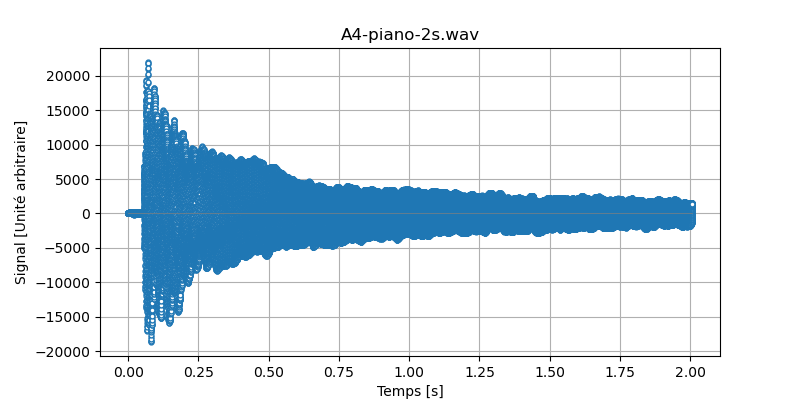

In [11]:
sample_rate_p, data_p = wav_read('WAV/A4-piano-2s.wav')
plot_sig_ech(1/sample_rate_p, data_p[:,0], title='A4-piano-2s.wav')

<IPython.core.display.Javascript object>


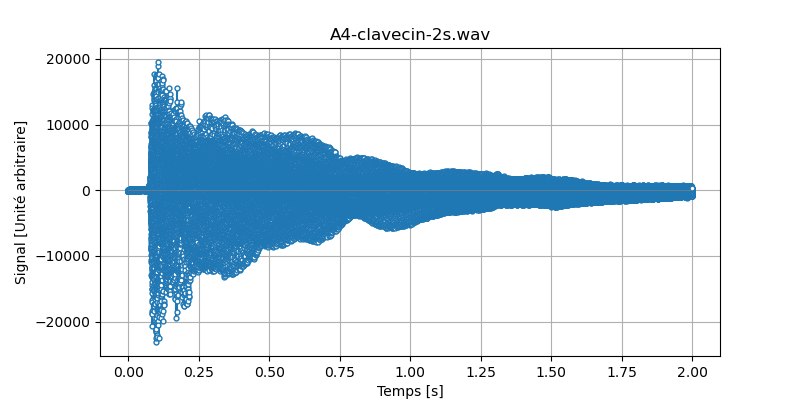

In [12]:
sample_rate_c, data_c = wav_read('WAV/A4-clavecin-2s.wav')
plot_sig_ech(1/sample_rate_c, data_c[:,0], title='A4-clavecin-2s.wav')

<h3 style="color:brown">Points d'intérêt</h3>

- <span style="color:brown">La visualisation des sons dans le domaine temporel montre l'__enveloppe temporelle__ qui caractérise leur dynamique : pour les sons de piano et de clavecin, on distingue une __attaque brève__, suivie d'une __descente douce__.</spawn>
- <span style="color:brown">L'enveloppe temporelle des sons fait partie des caractéristiques acoustiques qui nous permet de distinguer des sons différents.</spawn>

### 2.3 $-$ Analyse spectrale

#### Fréquence d'échantilonnage

- <span style="color:Green">Vérifier simplement que la fréquence d'échantilonnage des sons lus est la même, égale à 44100 Hz.</spawn>
- <span style="color:Green">Nommer `Fe` la fréquence d'échantillonnage, et définir `Te` la période d'échantilonnage associée.</spawn>

In [13]:
print(sample_rate_p, sample_rate_c)

44100 44100


In [14]:
Fe = sample_rate_c
Te = 1/Fe

#### Tracé des spectres d'amplitude

<span style="color:Green">En reprenant le travail du TP précédent, pour chacun des sons _piano_ et _clavecin_ :</spawn>
- <span style="color:Green">calculer `X`, la transformée de Fourier avec la fonction `rfft` (déjà importée du module __numpy.fft__), puis `A`, le spectre d'amplitude normalisé (divisé par la valeur max).</spawn>
- <span style="color:Green">utiliser la fonction `plot_spectre_amplitude` du module __tools__ pour tracer le spectre d'amplitude normalisé, en lui passant :<br>
    - les *arguments __positionnels__* : _le pas en fréquence (delta_f)_ et le _spectre d'amplitude_,
    - les _arguments __nommés___ : `f_max=10000`, `plot_harmonic=(15, 500)` et `title="titre bien choisi !"`.</spawn>
    
<span style="color:Green">La fonction `plot_spectre_amplitude` appelée avec l'argument `plot_harmonic=(n1, n2)` renvoit la liste des fréquences et la liste des amplitudes des `n1` harmoniques trouvées. Le paramètre `n2` indique le nombre de points pris en compte de part et d'autre de la position théorique des harmoniques pour trouver la raie d'amplitude maximale correspondant aux harmoniques réellement présentes.</spawn>

<span style="color:Green">Pour la suite du TP, il est utile de donner un nom aux deux listes renvoyées par la fonction `plot_spectre_amplitude` : par exemple `freq_p` et `pic_p` pour le son de piano, et `freq_c` et `pic_c` pour le clavecin.</spawn>


In [20]:
help(plot_spectre_amplitude)

In [21]:
N = len(data_p)                    # nbre d'échantillons temporels 
delta_f = Fe/N                     # delta_f = Fréq. éch. / nbre d'échantillons temporels  

X  = rfft(data_p[:,0])             # son stéréo: data_p[:,0] -> Gauche, data_p[:,1] -> Droite
A  = np.absolute(X)                # spectre d'amplitude
A  = A/A.max()                     # normalisation

titre = "Spectre Piano <La 440 Hz>"

freq_p, pic_p = plot_spectre_amplitude(delta_f, A, title=titre, f_max=10000, plot_harmonics=(10, 500))

In [22]:
N = len(data_c)                    # nbre d'échantillons temporels 
delta_f = Fe/N                     # delta_f = Fréq. éch. / nbre d'échantillons temporels  

X = rfft(data_c[:,0])              # son stéréo: data_c[:,0] -> Gauche, data_c[:,1] -> Droite
A = np.absolute(X)                 # spectre d'amplitude
A = A/A.max()                      # normalisation

titre = "Spectre Clavecin <La 440 Hz>"
freq_c, pic_c = plot_spectre_amplitude(delta_f, A, title=titre, f_max=10000, plot_harmonics=(15, 500))

<h3 style="color:brown">Points d'intérêt</h3>

<span style="color:brown"> - On constate bien sur les spectres la présence de la __raie fondamentale__ vers 440 Hz, qui donne la __hauteur__ du son.<br></spawn>
<span style="color:brown"> - Chacun des spectres montre des amplitudes des harmoniques différentes correspondant au __timbre__ propre à chacun des sons.</spawn>

Dans la suite de ce TP, on propose de modifier un son pur sinusoïdal à 440 Hz pour lui donner un timbre de _piano_ ou de _clavecin_.

## 3 $-$ Créer un son pur (sinusoïdal) et modifier son timbre<a name="2"></a>

On travaille avec la fréquence d'échantilonnage du standard HIFI, égale à 44100 Hz :

In [23]:
Fe = 44100
Te = 1/Fe
print(f"Fe = {Fe} Hz, Te = {Te*1000:.3f} ms")

## 3.1 $-$ Son pur sinusoïdal

On reprend le le signal sinusoïdal déjà manipulé dans le TP précédent : $$x(t) = \displaystyle{\sin\left( 2\pi F_s t\right)} = \displaystyle{\sin\left(\frac{2\pi t}{T_s}\right)}$$ de période $T_s$ défini à l'aide de la fonction `sin` du module *numpy* :

In [24]:
def x(t, T):
    return np.sin(2*pi*t/T)

<span style="color:Brown"> $\leadsto$  Grâce à la *vectorisation* de la fonction `np.sin`, le paramètre `t` peut-être un simple scalaire ou un tableau `np.ndarray` de valeurs temporelles.</span>

### Création du son pur à 440 Hz

- <span style="color:Green">Définir :</span>
    - <span style="color:Green">`Fs` la fréquence du signal sinus, égale à 440 Hz, et `Ts` la période correspondante.</spawn>
    - <span style="color:Green">`D` la durée du signal, égale à 2 secondes.</span>
    - <span style="color:Green">`t_ech` le vecteur des instants d'échantillonnage allant de 0 à `D` **inclus**, par pas de `Te` (*indications* : utiliser [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), `D` et `Te`).</span>
    - <span style="color:Green">`N` le nombre d'éléments de `t_ech`.</span>

In [25]:
Fs = 440           # fréquence signal en Hertz
Ts = 1/Fs          # période signal
D  = 2             # secondes
t_ech = np.arange(0, D+Te, Te)
N = len(t_ech)

- <span style="color:Green">Faire afficher `Fs`en Hertz, `Ts` en milli-seconde, `D` en seconde et `N`, ainsi que la première et la dernière valeur de `t_ech`</span><br>
 <span style="color:Green">$\leadsto$ Attention à bien maîtriser __le nombre de chiffres significatifs__ pour les valeurs de type __float__ en utilisant un _f-string_...</spawn>

In [26]:
print(f"Féquence Fs={Fs} Hz, période Ts={Ts*1000:.2f} ms")
print(f"Durée D: {D}s, nombre d'échantillons de temps : {N}")
print(f"première valeur du temps : {t_ech[0]}s, dernière valeur : {t_ech[-1]}s")

- <span style="color:Green">Calculer `sin440` le vecteur des valeurs de la fonction `x` pour les instants d'échantillonnage du vecteur `t_ech`.</span>

In [27]:
sin440 = x(t_ech, Ts)

### Visualisation dans le domaine temporel

- <span style="color:Green">Trace l'allure temporelle du son pur avec la fonction `plot_sig_ech`</spawn>

In [28]:
plot_sig_ech(Te, sin440, title='Sinus 440 Hz')

<h3 style="color:brown">Points d'intérêt</h3>

- <span style="color:brown"> On constate que l'enveloppe temporelle de ce son est constante : pas d'attaque ni de descente en terme d'amplitude.<br></spawn>
- <span style="color:brown"> En zoomant sur une période du signal, on peut vérifier l'allure sinusoïdale du signal.</spawn>

### Rendu sonore :

Pour obtenir le rendu sonore, on écrit les valeurs du signal `sin440` dans un fichier WAV que l'on peut ensuite jouer avec la fonction `play`.

Les valeurs écrites dans un fichier WAV doivent être des entiers sur 2 octets (16 bits) correspondant au type `np.int16`. L'expression `np.iinfo(np.int16)` montre les valeurs min et max d'un entier `np.int16` :

In [29]:
np.iinfo(np.int16)

- <span style="color:Green">Définir `amplitude`, égale à `np.iinfo(np.int16).max`</spawn>
- <span style="color:Green">Définir `data`, le signal `sin440` multiplié par `amplitude`.</spawn>
- <span style="color:Green">Utiliser la fonction `wav_write` pour écrire `data` dans le fichier "sin440.wav" (si besoin, l'aide sur la fonction `wav_write` est [ici](tools/scipy_wav.ipynb#wav_write)).<br>
    _Indication_: les données `data` doivent être passées à la fonction `wav_write` sous la forme convertie en entiers de 16 bits : __`data.astype(np.int16)`__</spawn><br>
- <span style="color:Green">Écouter le fichier WAV obtenu.

In [30]:
amplitude = np.iinfo(np.int16).max
data = sin440*amplitude
wav_write("sin440.wav", Fe, data.astype(np.int16))

In [31]:
play("sin440.wav")

<h3 style="color:brown">Points d'intérêt</h3>

- <span style="color:brown">Un son pur (ici à 440 Hz) n'pas très agréable à écouter ....<br></spawn>

### Modification de l'allure temporelle

<span style="color:Green">Pour se rapprocher de l'allure temporelle des sons ciblés (piano, clavecin...) , definir la fonction `weight` qui prend en argument un vecteur d'instants temporels, un temps `t1` et un entier `n` et qui échantillonne sur ces instants une enveloppe constituée :</spawn>
- <span style="color:Green">d'une attaque linéaire de 0 à 1 en `t1` secondes</spawn>
- <span style="color:Green">suivie d'une descente en exponentielle décroissante partant de 1, de la forme $\displaystyle{\left(e^{(t_1-t)}\right)^n}$ .</spawn>

![allure_enveloppe.png](img/allure_enveloppe.png)

<span style="color:Green">La fonction `weight` renvoie le tableau __ndarray__ des valeurs de l'enveloppe temporelle échantillonnées sur les instants de `t_ech`.</spawn>


In [ ]:
def weight(t_ech, t1, n):
    T = []
    for t in t_ech:
        if t < t1: 
            T.append(t/t1)
        else:
            T.append(np.exp(t1-t)**n)
    return np.array(T)

- <span style="color:Green">Définir le nouveau signal `sin440_w` égal au produit terme à terme de `sin440` par `weight(t_ech, 30e-3, 3)` (_indication_: utiliser le produit `*`). Tracer son allure temporelle.</spawn>

In [ ]:
sin440_w = sin440*weight(t_ech, 30e-3, 3)

In [ ]:
plot_sig_ech(Te, sin440_w, title="Produit du sinus 440 Hz par l'enveloppe temporelle")

- <span style="color:Green">Comment précédemment, écrire le signal `sin440_w` multiplié par `amplitude` dans le fichier `"sin440_w.wav"` puis écouter le fichier WAV obtenu.</spawn>

In [ ]:
amplitude = np.iinfo(np.int16).max
data = sin440_w*amplitude
wav_write("sin440_w.wav", Fe, data.astype(np.int16))

In [ ]:
play("sin440_w.wav")

<h3 style="color:brown">Points d'intérêt</h3>

- <span style="color:brown"> L'attaque et la décroissance de ce signal font bien penser au son produit par un instrument à corde pincée ou frappée</spawn>
- <span style="color:brown"> Mais le timbre n'est pas celui d'un piano ou d'un clavecin.....</spawn>

[top](#top)

### 3.3 Modifier le timbre du son pur <a name="3.3"> </a>

Pour modifier le son pur pour qu'il resssemble à un son de piano ou de clavecin, il faut lui rajouter les harmoniques correspondant au timbre de ces instruments...

Pour traiter la suite du TP, il faut utiliser les listes des amplitudes des harmoniques `pic_p` et `pic_c` obtenues au paragraphe 2.3 lors de l'analyse spectrale des sons de piano et clavecin.

### Synthèse de Fourier

<span style="color:Green">Définir la fonction `synthese_Fourier` qui prend en arguments :</spawn>
- <span style="color:Green">la fréquence $F_1$ du fondamental,</spawn>
- <span style="color:Green">le nombre $N$ d'harmoniques à ajouter,</spawn>
- <span style="color:Green">la liste des amplitudes des harmoniques,</spawn>
- <span style="color:Green">le vecteur des instants d'échantillonnage.</spawn>
    
<span style="color:Green">La fonction `synthese_Fourier` renvoie le calcul de : 
    $\displaystyle{sin(2 \pi F_1 t_j) + \sum_{i=2}^{i=N+1} A_i sin(2 \pi F_i t_j)}$,<br>
    ($N$: nbre d'harmoniques (fondamental inclu), $A_i$ : amplitude harmonique i, et $F_i$ : fréquence harmonique i ($F_i=i*F_1$)<br>
pour toutes les  valeurs $t_j$ du vecteur des instants d'échantillonnage.</spawn>

In [ ]:
def synthese_fourier(freq_1, nb_harm, ampl_harm, vect_t):
    # le fondamental:
    x = np.sin(2*pi*freq_1*vect_t)
    
    for i, a in enumerate(ampl_harm, 2):
        f_harmo = i*freq_1
        #print(f"{f_harmo:8d} Hz\t{a:8.4f}")
        x = x + a*np.sin(2*pi*f_harmo*vect_t) 
    return x

### Son pur transformé en son de piano

<span style="color:Green">Définir `sin440_p`, la synthèse de Fourier du son de piano obtenue avec les amplitudes des 8 premières harmoniques `picp_p`. Normaliser les valeurs de `sin440_p`.</spawn>

In [ ]:
sin440_p = synthese_fourier(440, 8, pic_p , t_ech)
sin440_p /= sin440_p.max()

<span style="color:Green">Multiplier `sin440_p` par `np.iinfo(np.int16).max`, puis par l'enveloppe `weight(t_ech, 5e-3, 3)` et enregistrer le signal obtenu dans le fichier `sin440_p.wav`.</spawn>

In [ ]:
amplitude = np.iinfo(np.int16).max
data = sin440_p*amplitude*weight(t_ech, 5e-3, 3)
wav_write("sin440_p.wav", Fe, data.astype(np.int16))

<span style="color:Green">Jouer successivement :</spawn>
- <span style="color:Green">le son original du piano (`WAV/A4-piano-2s.wav`),</spawn>
- <span style="color:Green">le son sinus pur avec l'enveloppe temporelle (`sin440_w.wav`),</spawn>
- <span style="color:Green">le son créé par synthèse de Fourier (`sin440_p.wav`) :</spawn>

In [ ]:
play("WAV/A4-piano-2s.wav")

In [ ]:
play("sin440_w.wav")

In [ ]:
play("sin440_p.wav")

### Son pur transformé en son de clavecin

<span style="color:Green">Définir `sin440_c`, la synthèse de Fourier du son de clavecin obtenue avec les amplitudes des 15 premières harmoniques `picp_c`. Normaliser les valeurs de `sin440_c`.</spawn>

In [ ]:
sin440_c = synthese_fourier(440, 15, pic_c , t_ech)
sin440_c /= sin440_c.max()

<span style="color:Green">Multiplier `sin440_c` par `np.iinfo(np.int16).max`, puis par l'enveloppe `weight(t_ech, 10e-3, 2)` et enregistrer le signal obtenu dans le fichier `sin440_c.wav`.</spawn>

In [ ]:
amplitude = np.iinfo(np.int16).max
data = sin440_c*amplitude*weight(t_ech, 10e-3, 2)
wav_write("sin440_c.wav", Fe, data.astype(np.int16))

<span style="color:Green">Jouer successivement :</spawn>
- <span style="color:Green">le son original du clavecin (`WAV/A4-clavecin-2s.wav`),</spawn>
- <span style="color:Green">le son sinus pur avec l'enveloppe temporelle (`sin440_w.wav`),</spawn>
- <span style="color:Green">le son de clavecin créé par synthèse de Fourier (`sin440_c.wav`) :</spawn>

In [ ]:
play("WAV/A4-clavecin-2s.wav")

In [ ]:
play("sin440_w.wav")

In [ ]:
play("sin440_c.wav")